In [8]:
#importing all the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random 

In [9]:
#load a single image from the bacteria folder
def load_image(path):
    for img in os.listdir(path):
        print('Image name =',img)
        image = cv.imread(os.path.join(path, img))
        break
    return image


Image name = person1000_bacteria_2931.jpeg
Thedimensions are 760 pixels height and 1152 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 114.5373
Thestandard deviation is 56.2341


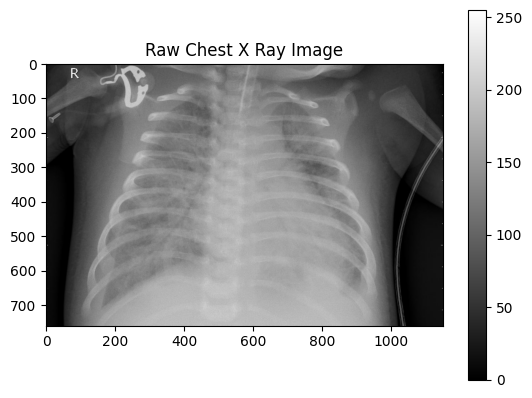

In [10]:
# Investigate a single image
bacteria_path = './chest_xray/train/PNEUMONIA/'
image = load_image(bacteria_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"Thedimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
print(f"The mean value of the pixels is {image.mean():.4f}")
print(f"Thestandard deviation is {image.std():.4f}")


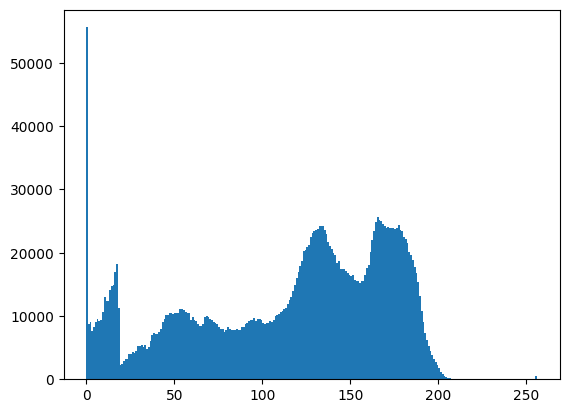

In [12]:
# plot a histogram
plt.hist(image.ravel(),256,[0,256]) 
plt.show()

In [14]:
# loading the path of the train images
path = './chest_xray/train/'
train = os.listdir(path)
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)

['NORMAL', 'PNEUMONIA']


In [15]:
folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)
labels = folders
print (f'Thelabels are {labels}')
# setting the size of images that we want
image_size = 256
print(f'All images to be resized into {image_size}*{image_size} pixels')

['NORMAL', 'PNEUMONIA']
Thelabels are ['NORMAL', 'PNEUMONIA']
All images to be resized into 256*256 pixels


In [ ]:
lst = os.listdir(os.path.join(path, labels[1])) # your directory path
number_files = len(lst)
number_files

3875

In [99]:
# defining a function to load images and labels together
# this function will also resize the images
def load_train(path):
    images = []
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        i = 0
        print(label)
        number_files = len(os.listdir(direc))
        for image in os.listdir(direc):
            i+=1
            print(i,'/',number_files,'->',i*100//number_files,'%',end = '\r')
            # if(i>=500):
            #     break
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
        print(i)
    return np.array(images)

In [100]:
#load all the training images to train_images
train_images = load_train(path)
print(f'Shapeof the training images = {train_images.shape}')

NORMAL
1341 / 1341 -> 100 %
PNEUMONIA
3875 / 3875 -> 100 %
Shapeof the training images = (5216, 2)


C:\Users\P\AppData\Local\Temp\ipykernel_6032\2575572017.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


In [101]:
#loading the images and labels seperately in X and y, to be used later for training
X = []
y = []
for feature, label in train_images:
    X.append(feature)
    y.append(label)
print (f'Lengthof X = {len(X)}')
print (f'Lengthof y = {len(y)}') 

Lengthof X = 5216
Lengthof y = 5216


In [102]:
# checking the number of images of each class
a = 0
b = 0
for label in y:
    if label == 0:
        a += 1
    if label == 1:
        b += 1


In [103]:
zero = np.where(np.array(y) ==0)
one = np.where(np.array(y) ==1)
print(len(zero[0]),len(one[0]))

1341 3875


Numberof Normal images = 1341
Numberof Bacteria images = 3875


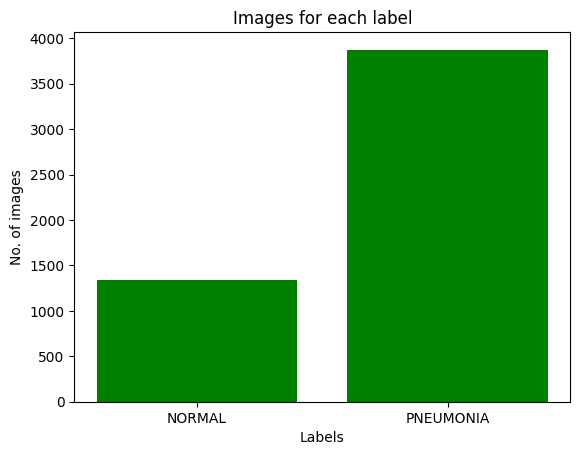

In [104]:
print (f'Numberof Normal images = {a}')
print (f'Numberof Bacteria images = {b}')
# plotting the data
x_pos = [i for i, _ in enumerate(labels)]
numbers = [a,b]
plt.bar(x_pos,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")
plt.xticks(x_pos, labels)
plt.show()

Display Random Images


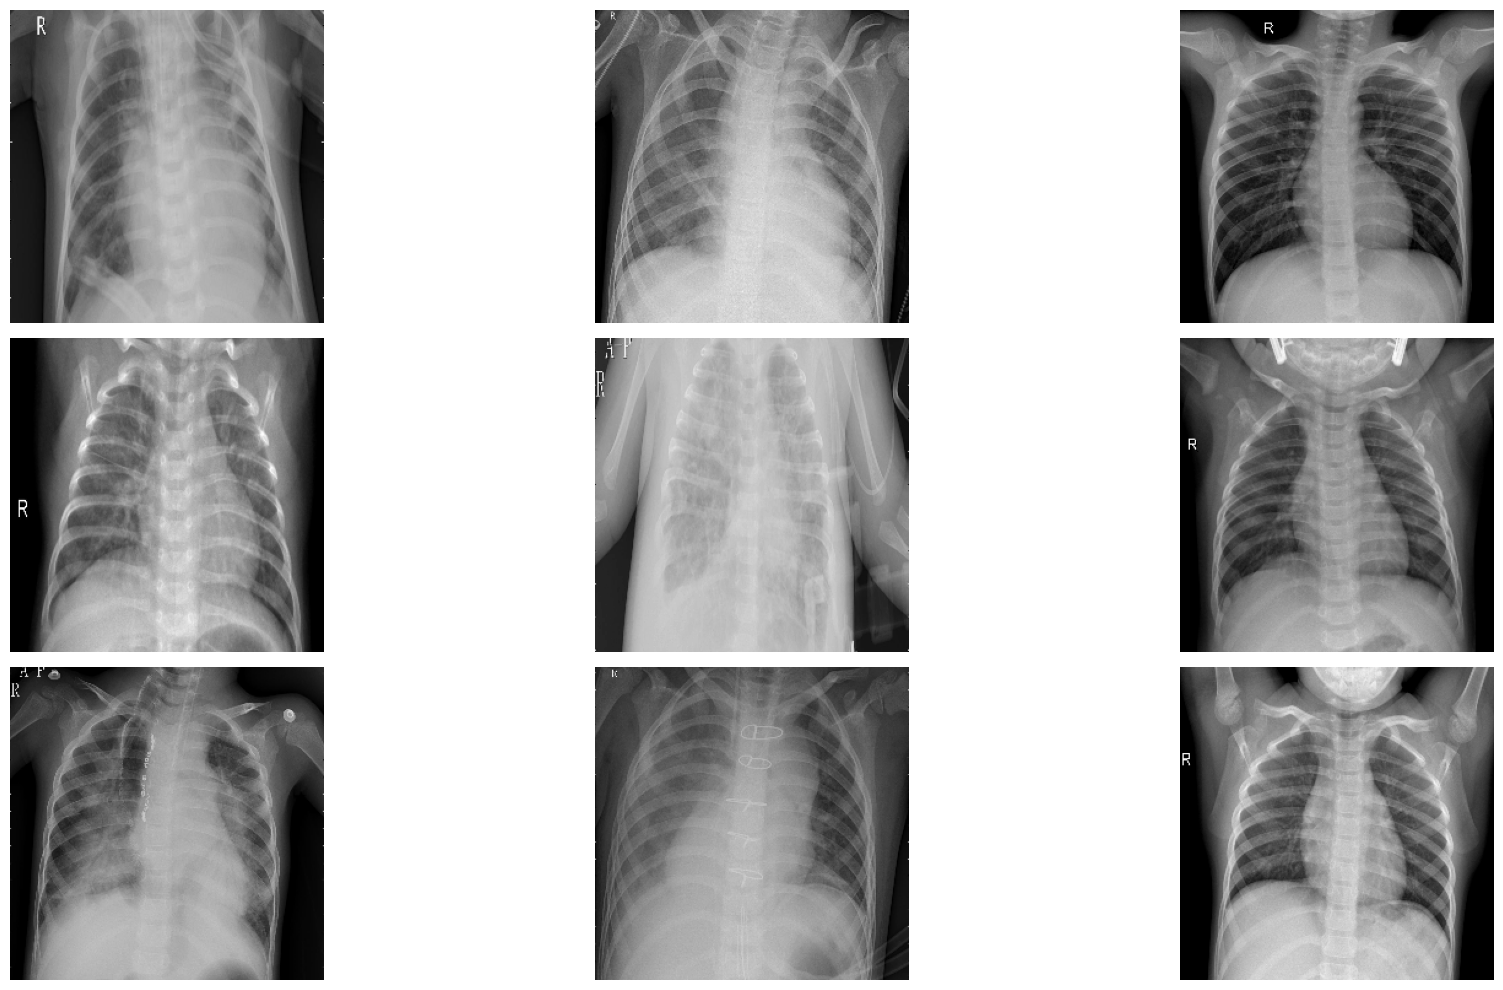

In [105]:
# Displays images 
# Extract 9 random images
print('Display Random Images')
# Adjust the size of your images
plt.figure(figsize=(20,10))
for i in range(9):
    num = random.randint(0,len(X)-1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[num],cmap='gray')
    plt.axis('off')
# Adjust subplot parameters to give specified padding
plt.tight_layout()